In [115]:
from activ import load_data, data_normalization
import matplotlib.pyplot as plt
import numpy as np
import os
import h5py
from activ.readfile import TrackTBIFile

In [116]:
raw = load_data()

In [117]:
nmfdata = load_data(uoinmf=True)

KeyError: "Unable to open object (object 'biomarker_bases' doesn't exist)"

In [114]:
rawbm = raw.biomarkers #(247,235)
A = data_normalization.data_normalization(raw.outcomes, 'positive') #(247,177)

In [91]:
w = nmfdata.outcomes #(247,6)
h = nmfdata.outcome_bases #(6,177)

(6, 177)

In [118]:
def drop_x_percent(A,w,h,percent):
    total_features = h.shape[1]
    num_features_to_drop = np.round(total_features*percent//100)
    h_sum = np.sum(h, axis=0)
    h_sum_sorted = np.argsort(h_sum)
    indices_lowest_values = h_sum_sorted[:num_features_to_drop]
    h_new = np.delete(h, indices_lowest_values, axis=1)
    A_new = np.delete(A, indices_lowest_values, axis=1)    
    return A_new

In [119]:
A_features_dropped = drop_x_percent(A,w,h,10)
A_features_dropped.shape

(247, 160)

In [120]:
fname = '/Users/ahyeon/Desktop/activ/activ/data_uoinmf.h5'
TrackTBIFile.write(fname, rawbm, A_features_dropped)

In [121]:
fname = '/Users/ahyeon/Desktop/activ/activ/data_uoinmf.h5'

f = h5py(fname, 'r')
print(list(f.keys()))

TypeError: 'module' object is not callable

In [ ]:
from activ.readfile import TrackTBIFile

def drop_one_feature(A, w, h):
    indices = []
    count=0
    norms = []
    features = []
    new_As = []
    h_sum = np.sum(h,axis=0)
    mn = min(h_sum)
    while count < 30:
        for ii, value in enumerate(h_sum):
            if value == mn:
                indices.append(ii)
        h_new = np.delete(h, indices, axis=1)
        A_new = np.delete(A, indices, axis=1)
        new_norm = np.linalg.norm(A_new - w.dot(h_new))
        num_features = h_new.shape[1]
        norms.append(new_norm)
        features.append(num_features)
        new_As.append(A_new)
#         fname = os.path.join('Users/ahyeon/Desktop/activ/bin', 'A_{}_features.h5'.format(num_features))
#         with h5py.File(fname, 'w') as f:
#             f.create_dataset('A_{}_features'.format(num_features), data=A_new)
        h = h_new
        A = A_new
        count += 1
    return norms, features, new_As
        
norm, features, new_As = drop_one_feature(A,w,h)
plt.plot(features, norm, '.')

In [49]:
new_As[0].shape

(247, 176)

In [56]:
new_norm

4826.9874262141439

In [101]:
def drop_features(thres, A, w, h):
    indices = []
    h_sum = np.sum(h,axis=0)
    for ii, value in enumerate(h_sum):
        if value < thres:
            indices.append(ii)
    h_new = np.delete(h, indices, axis=1)
    A_new = np.delete(A, indices, axis=1)
    new_norm = np.linalg.norm(A_new - w.dot(h_new))
    num_features = h_new.shape[1]
    return new_norm, num_features
    

Text(0,0.5,'Norm')

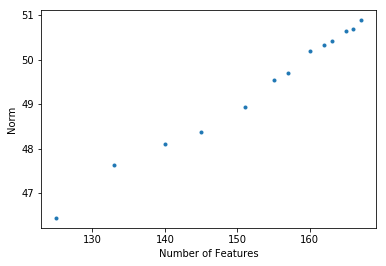

In [102]:
thres = [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17]
norms = []
features = []
for t in thres:
    norm, num_features = drop_features(t, A, w, h)
    norms.append(norm)
    features.append(num_features)


plt.plot(features, norms, '.')
plt.xlabel('Number of Features')
plt.ylabel('Norm')


In [89]:
np.sort(norms)

array([ 4293.06029489,  4587.25678069,  4590.43368198,  4661.04794103,
        4815.67955668,  4816.82302432,  4816.95372662,  4826.98742621,
        4829.17245647,  4829.18003241,  4829.2307164 ,  4829.52551457,
        4829.52756873])